# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
len(merged_data['Mouse ID'].unique())

249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = []

for value in merged_data['Mouse ID'].unique() :
    pot = merged_data[merged_data['Mouse ID'] == value]
    if 2 in pot['Timepoint'].value_counts().to_list() :
        duplicates.append(value)
np.array(duplicates)

array(['g989'], dtype='<U4')

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data['Mouse ID'] == duplicates[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data = merged_data[merged_data['Mouse ID'] != duplicates[0]]
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice in the clean DataFrame.
len(merged_data['Mouse ID'].unique())

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Drug_Regimen_grouped = merged_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

Mean_tumor_volume = Drug_Regimen_grouped.mean()
Median_tumor_volume = Drug_Regimen_grouped.median()
Variance_tumor_volume = Drug_Regimen_grouped.var()
Std_tumor_volume = Drug_Regimen_grouped.std()
Sem_tumor_volume = Drug_Regimen_grouped.sem()

zero_data = np.zeros(shape=(10,5))

Tumor_volume = pd.DataFrame(zero_data, index=Mean_tumor_volume.index, columns=['Mean tumor volume', 'Median tumor volume', 'Variance tumor volume', 'Std tumor volume', 'Sem tumor volume'])

Tumor_volume['Mean tumor volume'] = Mean_tumor_volume
Tumor_volume['Median tumor volume'] = Median_tumor_volume
Tumor_volume['Variance tumor volume'] = Variance_tumor_volume
Tumor_volume['Std tumor volume'] = Std_tumor_volume
Tumor_volume['Sem tumor volume'] = Sem_tumor_volume

Tumor_volume

,Mean tumor volume,Median tumor volume,Variance tumor volume,Std tumor volume,Sem tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

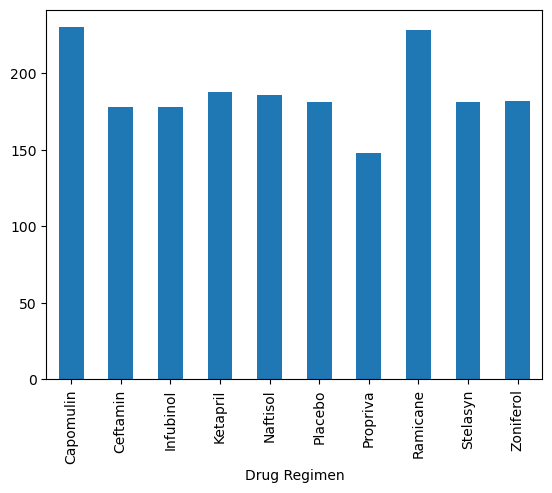

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

merged_data.groupby(['Drug Regimen'])['Mouse ID'].count().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

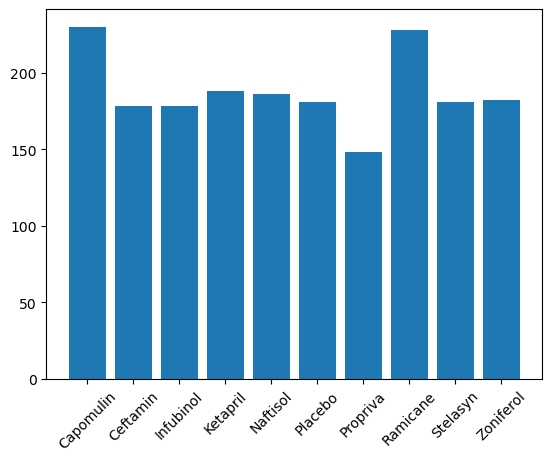

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(merged_data.groupby(['Drug Regimen'])['Mouse ID'].count().index, merged_data.groupby(['Drug Regimen'])['Mouse ID'].count())
plt.xticks(rotation = 45)

<AxesSubplot:ylabel='Sex'>

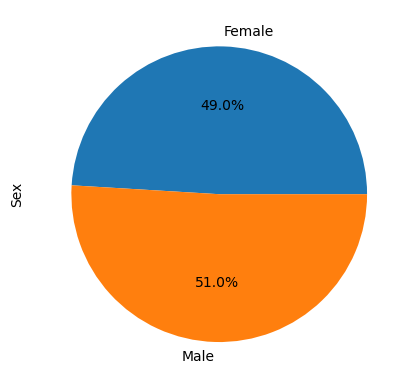

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

merged_data.groupby(['Sex'])['Sex'].count().plot.pie(autopct='%1.1f%%')

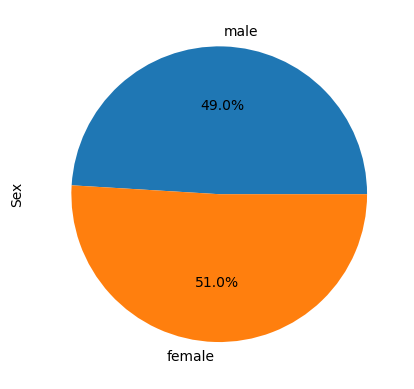

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(merged_data.groupby(['Sex'])['Sex'].count(), autopct='%1.1f%%', labels=['male', 'female'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

import warnings
warnings.filterwarnings('ignore')

last_timepoint = pd.DataFrame(columns=merged_data.columns)

for value in merged_data['Mouse ID'].unique() :
    
    last_timepoint = last_timepoint.append(merged_data[merged_data['Mouse ID']==value].query('Timepoint == Timepoint.max()'))


last_timepoint = last_timepoint.reset_index(drop=True)
last_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [129]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# impelment last timepoint volume tumours in the tumo_vol list
for value in treatments :
    tumor_vol.append(last_timepoint[last_timepoint['Drug Regimen'] == value]['Tumor Volume (mm3)'])

# define a function to give us upper and lower limits for outliers in a column
import copy
def outlier_treatment(df):
    datacolumn = copy.deepcopy(df)
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range  
    
# print the ootential outliers in every treatement 
for i in range(len(tumor_vol)) :
    # Determine outliers using upper and lower bounds

    lowerbound,upperbound = outlier_treatment(tumor_vol[i])
    print(treatments[i] + ' potential outliers: ' + str(tumor_vol[i][(tumor_vol[i] < lowerbound) | (tumor_vol[i] > upperbound)]))
    
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


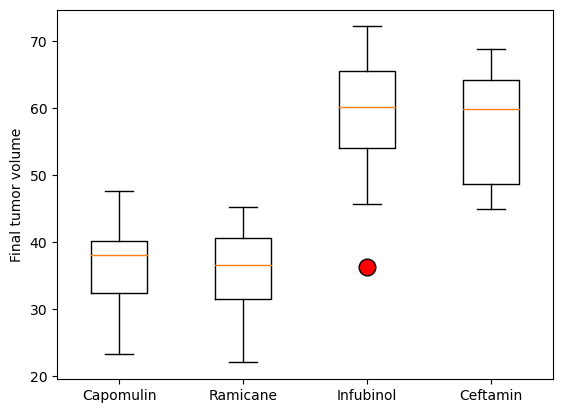

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none')

plt.boxplot(tumor_vol, labels=treatments, flierprops=flierprops)
plt.ylabel('Final tumor volume')
plt.show()

## Line and Scatter Plots

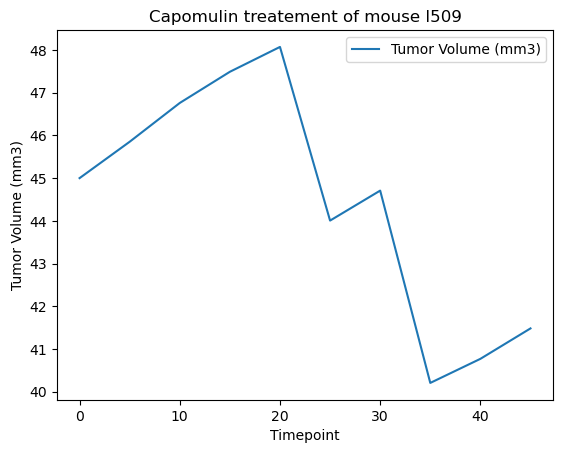

In [145]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = merged_data[(merged_data['Drug Regimen']=='Capomulin')&(merged_data['Mouse ID']=='l509')]
mouse_data.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatement of mouse l509')
plt.show()

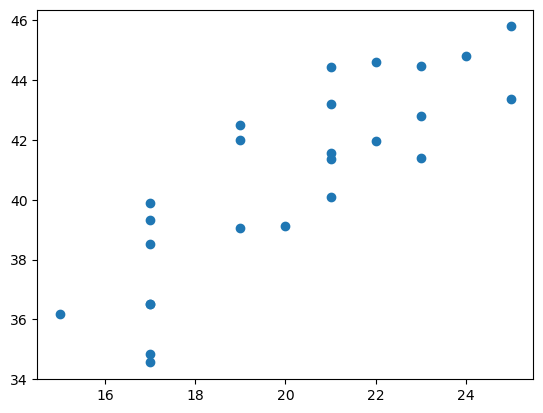

In [157]:

#average_tumour_Capomulin.plot(x='Weight (g)')

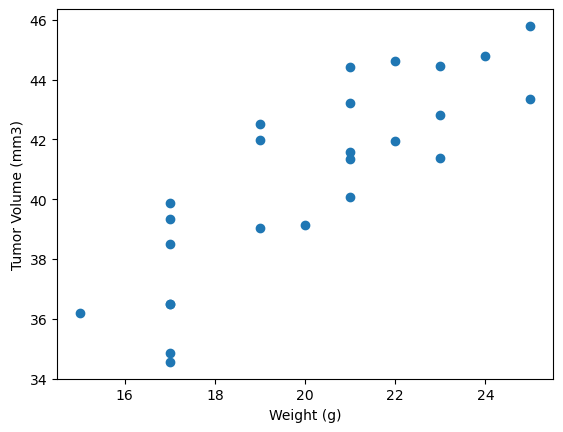

In [159]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumour_Capomulin = merged_data[merged_data['Drug Regimen']=='Capomulin'].groupby(['Mouse ID']).mean()
plt.scatter(y = average_tumour_Capomulin['Tumor Volume (mm3)'], x=average_tumour_Capomulin['Weight (g)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694719


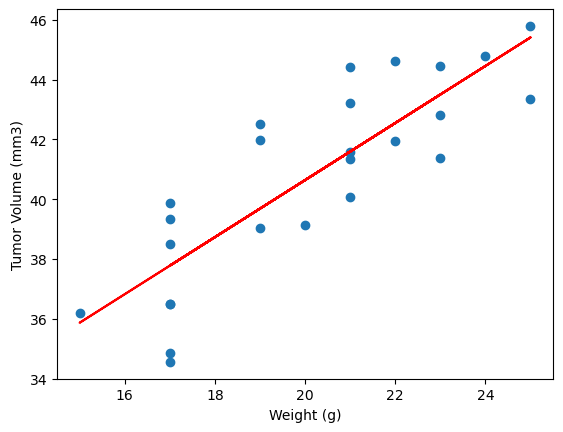

In [188]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr_data = average_tumour_Capomulin[['Weight (g)', 'Tumor Volume (mm3)']]
coeff = corr_dara.corr()['Tumor Volume (mm3)']['Weight (g)']

print('The correlation between mouse weight and the average tumor volume is ' + str(coeff))


from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 
regressor.fit(corr_dara['Weight (g)'].values.reshape(-1, 1), corr_data['Tumor Volume (mm3)']) 

plt.scatter(y = corr_dara['Tumor Volume (mm3)'], x=corr_data['Weight (g)'])
plt.plot(corr_data['Weight (g)'], regressor.predict(corr_data['Weight (g)'].values.reshape(-1, 1)), color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
